# Install and import relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read and load the data

In [4]:
def load_data(data):
  return pd.read_csv(data)

def variable_data(data):
  label = data.iloc[: , 0].astype('uint8')
  value = data.iloc[: , 1:]
  column = list(data.columns.values.tolist())
  feature_name = [str(x) for x in column[1:]]
  return label, value, feature_name

## Dataset 1

Source: https://openmv.net/info/food-texture

Description: Texture measurements of a pastry-type food.

Data variables: 
- Oil: percentage oil in the pastry
- Density: the product’s density (the higher the number, the more dense the product)
- Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
- Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
- Hardness: a sharp point is used to measure the amount of force required before breakage occurs.

Data shape:	50 rows and 5 columns

In [5]:
dataset1 = 'dataset/food-texture.csv'
dataset1 = pd.read_csv(dataset1, index_col='sample_name')
dataset1.head()

# Extract data variables
label1, data1, feature_name1= variable_data(dataset1) 

n_samples1, n_features1 = data1.shape
print('Number of samples:', n_samples1)
print('Number of features:', n_features1)

dataset1.describe().transpose()

Number of samples: 50
Number of features: 4


,count,mean,std,min,25%,50%,75%,max
oil,50.0,17.202,1.592007,13.7,16.30,16.9,18.10,21.2
density,50.0,2857.600,124.499980,2570.0,2772.50,2867.5,2945.00,3125.0
crispy,50.0,11.520,1.775571,7.0,10.00,12.0,13.00,15.0
fracture,50.0,20.860,5.466073,9.0,17.00,21.0,25.00,33.0
hardness,50.0,128.180,31.127578,63.0,107.25,126.0,143.75,192.0


## Dataset 2

Source: Dharmawan et al 2025

Description: Shape descriptions of three coffee beans: longberry, premium, peaberry

Data variables: [area, perimeter, major_axis_length, minor_axis_length, bounding_box_area, convex_area, compactness, roundness, complexity, equiv_dimater, aspect_ratio, elongation, extent, convexity, solidity, SF1, SF2, SF3, SF4]

In [6]:
dataset2 = 'dataset/coffee-grading.csv'
dataset2 = load_data(dataset2)
dataset2.head(5)

# Extract data variables
label2, data2, feature_name2  = variable_data(dataset2)

label_name2 = ['longberry', 'normal', 'peaberry']
label_dict = {0: 'longberry', 1: 'normal', 2:'peaberry'}

n_samples2, n_features2 = data2.shape
print('Number of samples:', n_samples2)
print('Number of features:', n_features2)

dataset2.describe().transpose()

Number of samples: 1010
Number of features: 19


,count,mean,std,min,25%,50%,75%,max
class,1010.0,1.092079,0.762369,0.00000,1.000000,1.000000,2.000000,2.00000
area,1010.0,6800.110891,1241.210485,3827.50000,5845.250000,6806.500000,7698.500000,10744.00000
perimeter,1010.0,318.689769,30.694929,239.23759,296.400542,318.714245,340.032270,399.70562
major_axis_length,1010.0,112.669491,13.095990,81.52654,102.862070,111.106315,120.909595,152.25914
minor_axis_length,1010.0,77.038392,8.078990,56.93955,71.003887,77.381955,82.606522,103.04279
bounding_box_area,1010.0,8735.686139,1601.391882,4941.00000,7546.500000,8700.500000,9879.750000,13736.00000
convex_area,1010.0,6903.357921,1257.607763,3887.50000,5959.000000,6904.500000,7813.250000,10869.50000
compactness,1010.0,0.835428,0.029218,0.69939,0.819250,0.840240,0.857665,0.88967
roundness,1010.0,0.916652,0.028362,0.80403,0.900325,0.921125,0.938335,0.96928
complexity,1010.0,15.060900,0.546444,14.12470,14.651843,14.955660,15.338877,17.96763


# Visualizing multivariate data

https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/

## Pair plots

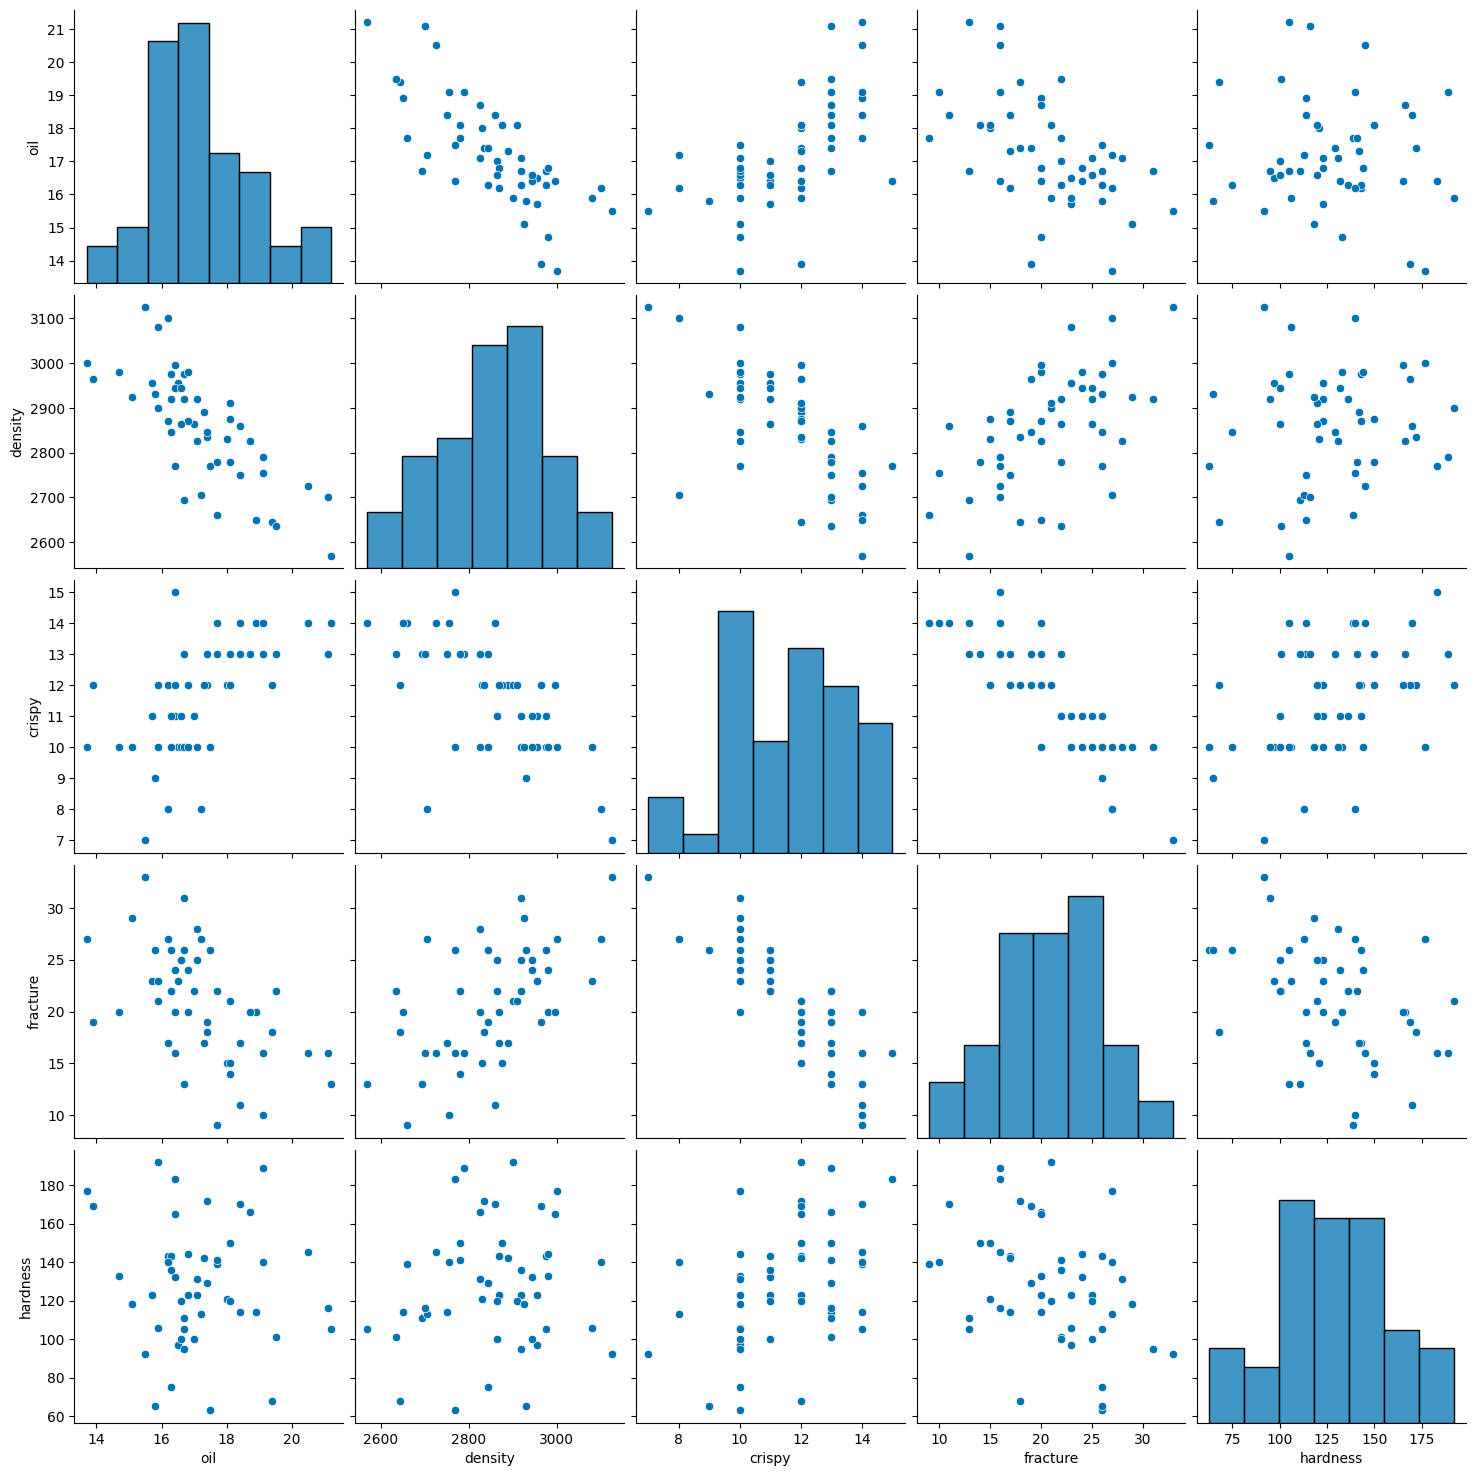

In [5]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=dataset1, height=3)

The pair plot effectively illustrates how the features vary and correlate across the three classes of coffee samples. In addition, it provides insights into the separability and overlap of these classes within the feature space, facilitating a deeper understanding of the characteristics and differences among the classes. The diagonal plot elements showcase the distribution of each feature, while the off-diagonal plot elements display scatterplots for each pair of features.

In [ ]:
"""For Classification"""
ax = sns.pairplot(dataset2, hue='class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Coffee Dataset")
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

## Histograms

Histograms are valuable tools for visualizing the distribution of individual features within the coffee dataset.

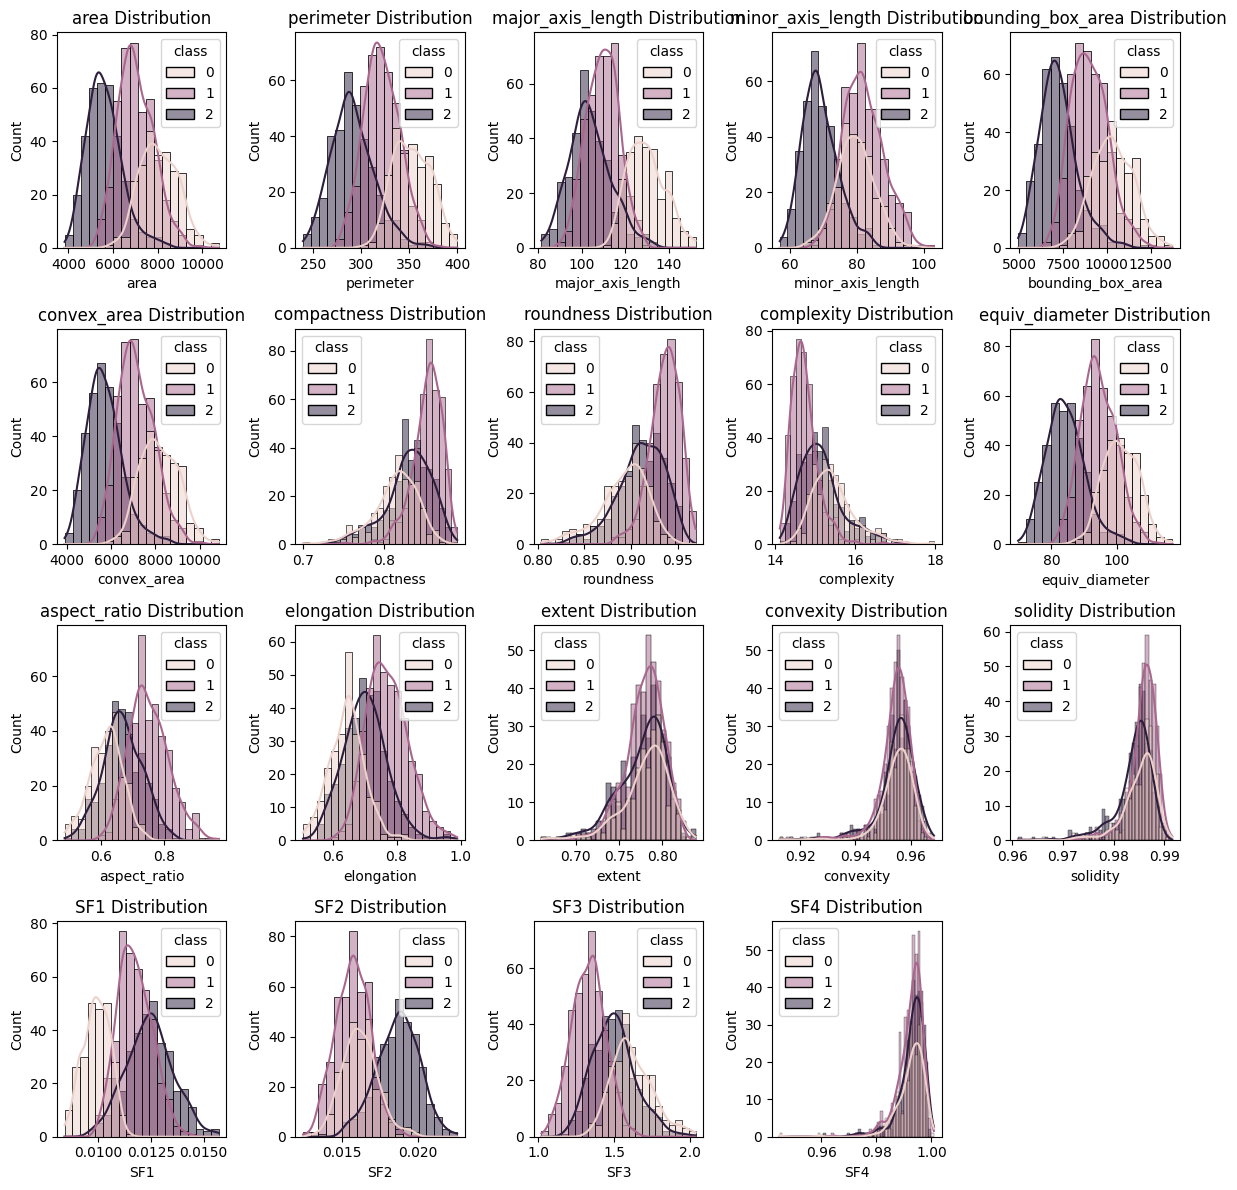

In [6]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 12))
for i, feature in enumerate(feature_name2):
    plt.subplot(4, 5, i+1)
    sns.histplot(data=dataset2, x=feature, hue='class', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

## Correlation heatmaps

A correlation heatmap offers insights into the relationships between different features in the coffee data set. It plays a critical role in feature selection as it helps identify positive and negative correlations between two variables.

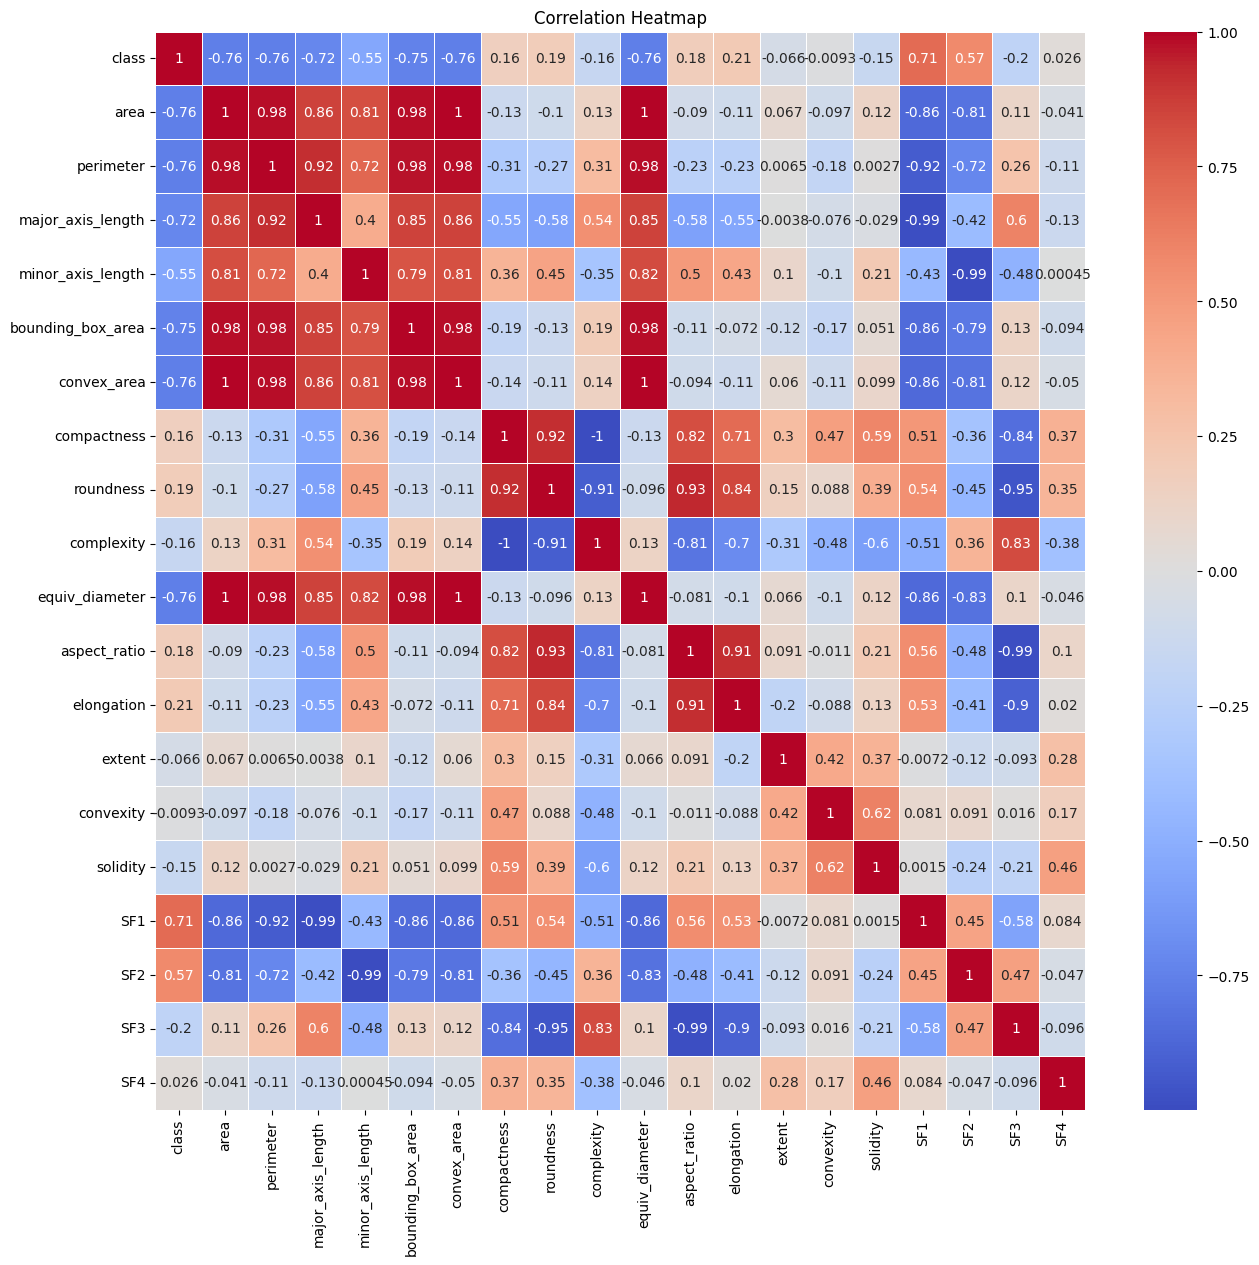

In [7]:
correlation_matrix = dataset2.corr(numeric_only= True)
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# LDA from scratch 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

## Data preparation

In [8]:
"""Data Scaling"""
x_scaled = StandardScaler().fit_transform(data2)

## Data Transformation

In [9]:
def lda(x, y):
    n_features = x.shape[1]
    class_labels = np.unique(y)
    
    """Computing the d-dimensional mean vector and the mean vector per class"""
    mean_overall = np.mean(x, axis=0)

    """Compting the within-class scatter matrix (SW)"""
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))

    for c in class_labels:
        x_c = x[y==c]
        # (4, n_c) * (n_c, 4) = (4,4) -> transpose
        mean_c = np.mean(x_c, axis=0)
        SW += (x_c - mean_c).T.dot((x_c - mean_c))
        
        # (4, 1) * (1, 4) = (4,4) -> reshape
        n_c = x_c.shape[0]
        mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
        SB += n_c * (mean_diff).dot(mean_diff.T)
    
    # determine: SW^-1 * SB
    A = np.dot(np.linalg.inv(SW),SB)
    
    # Get eigenvalues and eigenvectors of SW^-1 * SB
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Sort eigenvalues high to low
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    # Selecting linear discriminants for the new feature subspace
    linear_discriminants = eigenvectors[0:n_features]

    eigval_total = sum(eigenvalues)
    explained_variance = [(i/eigval_total) for i in sorted(eigenvalues, reverse=True)]
    explained_variance = np.round(explained_variance, 3)
    
    for b in explained_variance:
        if (b>(0.1/100)):
            print('Explained Variance: {}%'.format(b*100, 2))
    
    return linear_discriminants, explained_variance

lds, expl_var = lda(x_scaled, label2)

Explained Variance: (62+0j)%
Explained Variance: (38+0j)%


In [10]:
# Transforming the samples onto the new subspace
x_lda = np.dot(x_scaled, lds.T)

## Plotting the Result

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


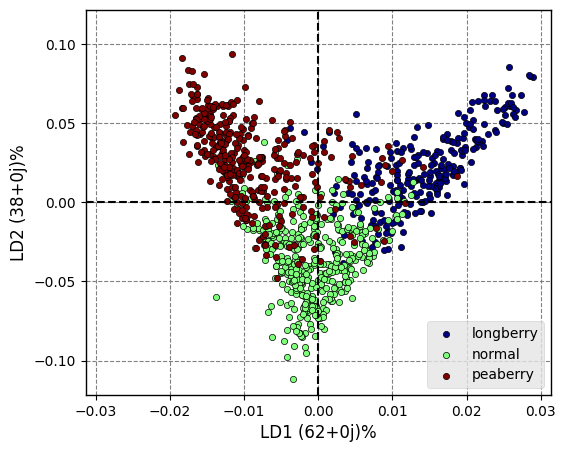

In [13]:
"""LDA Program 1"""
def plot_lda(x_lda, label, label_name, expl_var):
    """LDA Score Plot"""
    unique = list(set(label))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(6,5))
        for i, u in enumerate(unique):
            col = np.expand_dims(np.array(colors[i]), axis=0)
            ld1 = [x_lda[j,0] for j in range(len(x_lda[:,0])) if label[j] == u]
            ld2 = [x_lda[j,1] for j in range(len(x_lda[:,1])) if label[j] == u]
            plt.scatter(ld1, ld2, # ------------------------------------------------ < CHANGE INPUT
                        c=col, s=20, edgecolors='k', label=str(u))
        plt.legend(label_name, loc = 'lower right')
        #plt.title('LDA score plot')
        ax.axhline(y=0.0, color='black', linestyle='dashed', alpha = 1.0) # label = 'Horizontal Line ')
        ax.axvline(x=0.0, color='black', linestyle='dashed', alpha = 1.0) # label = 'Vertical Line ')     # , - -- : None , solid, dashed, dashdot, dotted
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        yabs_max = abs(max(ax.get_ylim(), key=abs))
        ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
        xabs_max = abs(max(ax.get_xlim(), key=abs))
        ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.set_xlabel('LD1 {}%'.format(expl_var[0]*100)).set_color('black')
        ax.set_ylabel('LD2 {}%'.format(expl_var[1]*100)).set_color('black')
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.set_facecolor("white")
        plt.show()
plot_lda(x_lda, label2, label_name2, expl_var)

# Refcode

https://python-course.eu/machine-learning/linear-discriminant-analysis-in-python.php

https://medium.com/accel-ai/lda-algorithm-tutorial-in-python-57ee62e71965

https://www.python-engineer.com/courses/mlfromscratch/14-lda/